In [1]:
import os
os.chdir('../')
%pwd

'/home/megh/AI/Projects/Semantic_Segmentation_for_self_driving_cars'

In [2]:
import tensorflow as tf

2023-09-28 15:05:34.934686: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 15:05:35.695391: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from src.components.data_preparation import DataIngestion
from src.components.data_preprocesing import DataPreprocessing
from src.components.callbacks import PrepareCallback
from src.components.model import PrepareModel
from src.config.configuration import ConfigurationManager
from src.entity.config_entity import DataIngestionConfig, PrepareCallbackConfig, PrepareModelConfig, DataPreprocessingConfig


In [4]:
from src.utils.common import display, create_mask, show_predictions

In [5]:
try:
    config = ConfigurationManager()
    prepare_data_config = config.get_data_ingestion_config()

    prepare_dataset = DataIngestion(config=prepare_data_config)
    imgs_list, masks_list = prepare_dataset.prepare_data()

    preprocessing_config = config.get_data_processing_config()
    preprocessing = DataPreprocessing(preprocessing_config,imgs_list, masks_list)
    train, val = preprocessing.data_preprocessing()

except Exception as e:
    raise e

[2023-09-28 15:05:41,657: INFO: common: yaml fileconfig.yamlloaded Successfully]
[2023-09-28 15:05:41,670: INFO: common: yaml fileparams.yamlloaded Successfully]
[2023-09-28 15:05:41,671: INFO: common: created directory at:artifacts]
[2023-09-28 15:05:41,672: INFO: common: created directory at:/media/Ubuntu/meg/mlprojects/Semantic_Segmentation_for_self_driving_cars/archive]


2023-09-28 15:05:41.727576: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2023-09-28 15:05:41.727612: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: megh
2023-09-28 15:05:41.727618: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: megh
2023-09-28 15:05:41.727780: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.113.1
2023-09-28 15:05:41.727796: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.86.5
2023-09-28 15:05:41.727801: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:312] kernel version 535.86.5 does not match DSO version 535.113.1 -- cannot find working devices in this configuration


In [6]:
from tensorflow.keras.models import load_model


In [7]:
model = load_model('model.h5')

2023-09-28 15:14:12.490849: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.


1/2 [==============>...............] - ETA: 3s

2023-09-28 15:14:15.225257: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.


2/2 [==============================] - 6s 3s/step


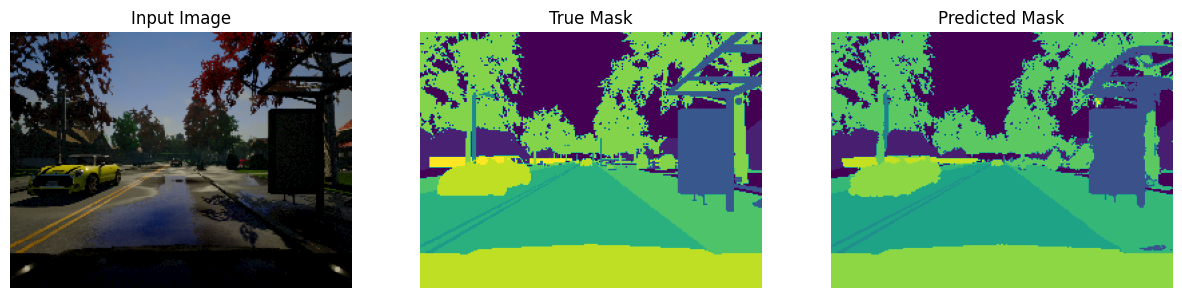

2023-09-28 15:14:18.559947: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.


1/2 [==============>...............] - ETA: 2s

2023-09-28 15:14:21.254815: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.


2/2 [==============================] - 6s 3s/step


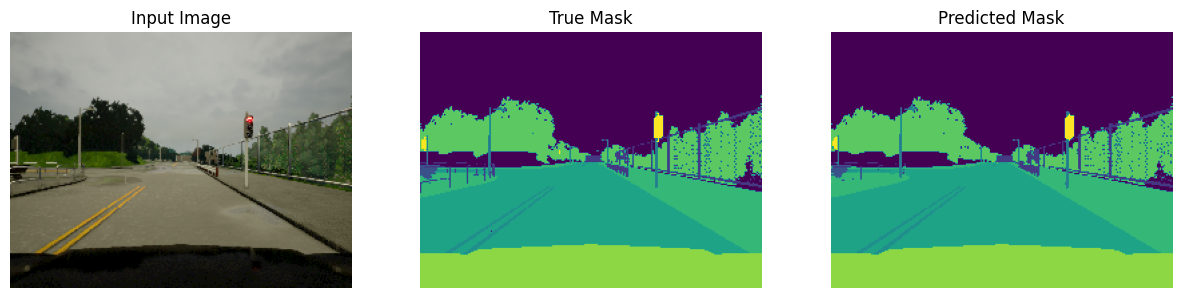

2023-09-28 15:14:24.392310: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.


2/2 [==============================] - 5s 3s/step


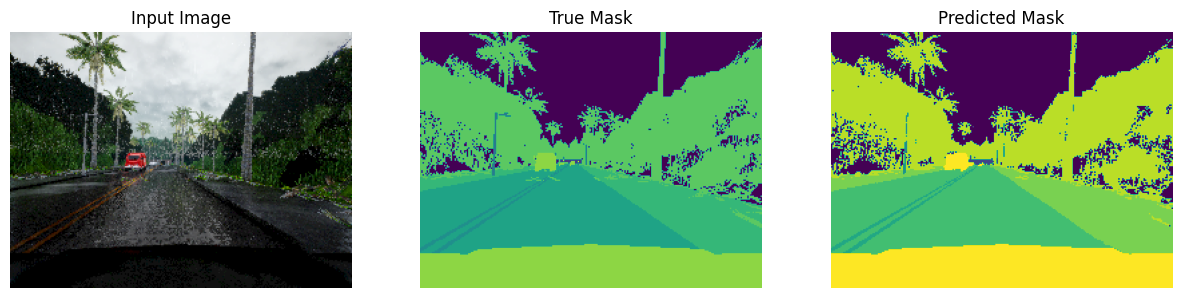

2/2 [==============================] - 5s 3s/step


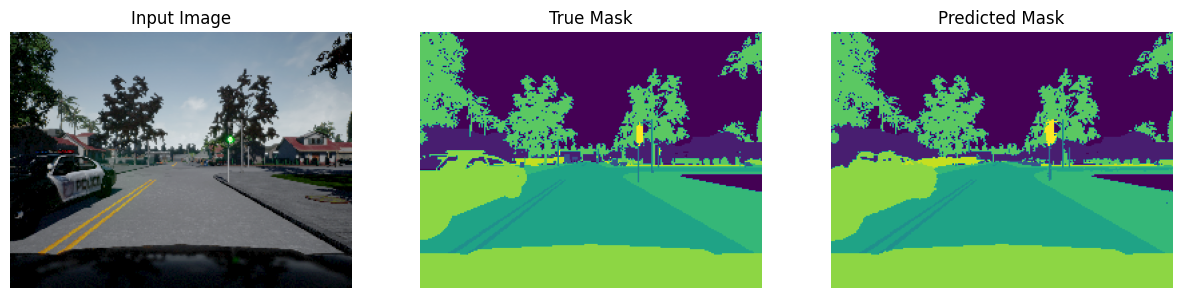

2/2 [==============================] - 5s 3s/step


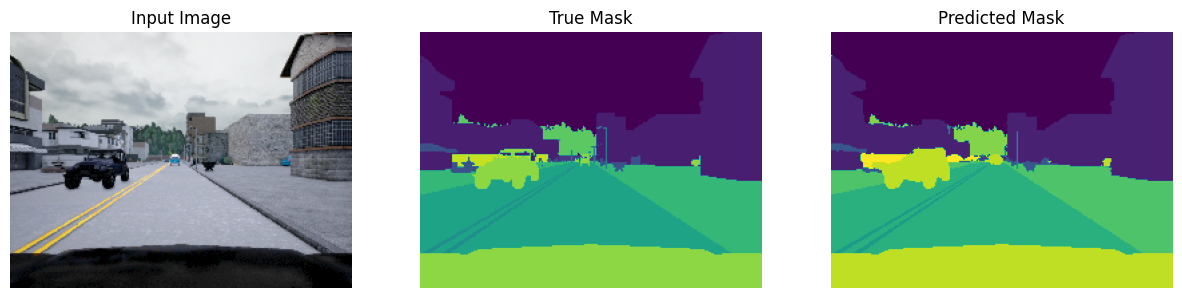

2/2 [==============================] - 5s 3s/step


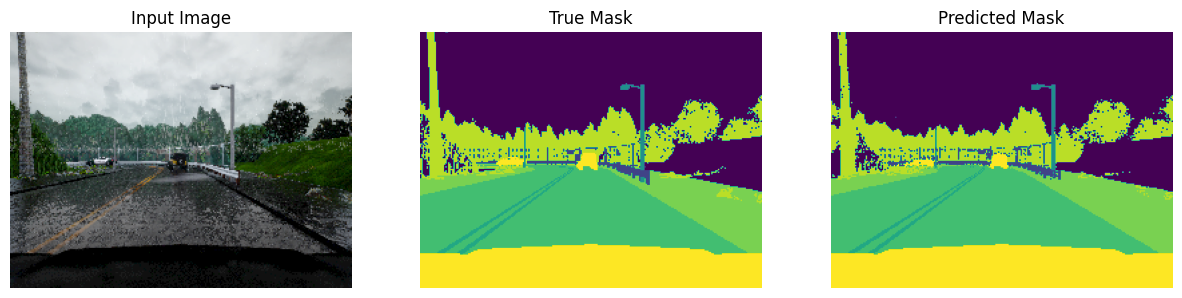

In [8]:
show_predictions(model,train, 6)
